## Chicago Crime Data

In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates

In [10]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\ROSA\Downloads/'



In [11]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [12]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,NaN,NaN,2023,09/14/2023 03:43:09 PM,NaN,NaN,NaN
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903061,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7903062,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7903063,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7903064,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [13]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
146665,1311626,G001009,01/01/2001 01:00:00 AM,023XX S TROY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1155692.0,1888116.0,2001,08/17/2015 03:03:40 PM,41.848786,-87.704087,"(41.848786421, -87.704086603)",2001-01-01 01:00:00
77690,1311049,G000125,01/01/2001 01:00:00 AM,032XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,NaN,14,1153841.0,1926448.0,2001,08/17/2015 03:03:40 PM,41.954010,-87.709858,"(41.954010014, -87.709857541)",2001-01-01 01:00:00
77179,1325760,G001074,01/01/2001 01:00:00 PM,029XX S CALIFORNIA AV,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,...,NaN,18,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-01-01 01:00:00
110520,1311735,G000502,01/01/2001 01:00:00 AM,069XX W BELMONT AV,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,NaN,04B,1129212.0,1920519.0,2001,08/17/2015 03:03:40 PM,41.938196,-87.800534,"(41.938196134, -87.800533735)",2001-01-01 01:00:00
156445,1311358,G001819,01/01/2001 01:00:00 PM,025XX W 45 PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,05,1160341.0,1874463.0,2001,08/17/2015 03:03:40 PM,41.811226,-87.687401,"(41.811226273, -87.687401084)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,13222804,JG438877,09/25/2023 12:00:00 AM,030XX N LINCOLN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,6.0,06,1166098.0,1920352.0,2023,10/02/2023 03:42:57 PM,41.937029,-87.664974,"(41.93702877, -87.664974127)",2023-09-25 12:00:00
14994,13222613,JG438759,09/25/2023 12:00:00 AM,036XX S HERMITAGE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,59.0,07,1165280.0,1880576.0,2023,10/02/2023 03:42:57 PM,41.827898,-87.669112,"(41.827897721, -87.669111806)",2023-09-25 12:00:00
14770,13226911,JG443674,09/25/2023 12:00:00 AM,026XX W ALBION AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,2.0,02,1157319.0,1943689.0,2023,10/02/2023 03:42:57 PM,42.001250,-87.696601,"(42.001250025, -87.696600836)",2023-09-25 12:00:00
14829,13222254,JG438289,09/25/2023 12:00:00 AM,132XX S COMMERCIAL AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,55.0,14,1198104.0,1817853.0,2023,10/02/2023 03:42:57 PM,41.655022,-87.550779,"(41.655021562, -87.550779127)",2023-09-25 12:00:00


## Separate the Full Dataset by Years

In [14]:
chicago_full['Datetime'].dt.year

146665    2001
77690     2001
77179     2001
110520    2001
156445    2001
          ... 
14387     2023
14994     2023
14770     2023
14829     2023
14594     2023
Name: Datetime, Length: 7903066, dtype: int64

In [15]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486808
2001    485889
2003    475985
2004    469423
2005    453775
2006    448178
2007    437090
2008    427184
2009    392827
2010    370517
2011    351993
2012    336323
2013    307540
2014    275792
2016    269835
2017    269108
2018    268912
2015    264796
2019    261354
2022    238971
2020    212220
2021    208878
2023    189668
Name: Year, dtype: int64

In [16]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [17]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,2001,41.848786,-87.704087
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,2001,41.954010,-87.709858
2001-01-01 01:00:00,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,2001,NaN,NaN
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,2001,41.938196,-87.800534
2001-01-01 01:00:00,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,41.811226,-87.687401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 12:00:00,13222804,09/25/2023 12:00:00 AM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,32.0,2023,41.937029,-87.664974
2023-09-25 12:00:00,13222613,09/25/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,912,9.0,12.0,2023,41.827898,-87.669112
2023-09-25 12:00:00,13226911,09/25/2023 12:00:00 AM,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,2412,24.0,50.0,2023,42.001250,-87.696601


In [18]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [19]:
FINAL_DROP = ['Year']

In [20]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [21]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [22]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [23]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
1,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
2,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
3,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
4,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401
...,...,...,...,...,...,...,...,...,...,...,...,...
189663,13222804,09/25/2023 12:00:00 AM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,32.0,41.937029,-87.664974
189664,13222613,09/25/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,912,9.0,12.0,41.827898,-87.669112
189665,13226911,09/25/2023 12:00:00 AM,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,2412,24.0,50.0,42.001250,-87.696601
189666,13222254,09/25/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,433,4.0,10.0,41.655022,-87.550779


## Set Date time as Index

In [24]:
## Creating/testing our time format
import datetime
today_datetime = datetime.datetime.today()

fmt = "%Y-%m-%d"
today_datetime.strftime(fmt)

'2023-10-04'

In [25]:
frmt = "%m/%d/%Y %I:%M:%S %p"
today_datetime.strftime(frmt)

'10/04/2023 07:34:15 PM'

In [26]:
%%time
## Use the fmt to convert datetime type
df['Date'] = pd.to_datetime(df['Date'], format=frmt)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903066 entries, 0 to 189667
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 678.3+ MB
CPU times: total: 16.8 s
Wall time: 19.5 s


In [27]:
## Set Date as index
df_ts = df.set_index('Date')
df_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1311626,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
2001-01-01 01:00:00,1311049,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
2001-01-01 01:00:00,1311735,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
2001-01-01 13:00:00,1311358,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00,13222804,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,32.0,41.937029,-87.664974
2023-09-25 00:00:00,13222613,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,912,9.0,12.0,41.827898,-87.669112
2023-09-25 00:00:00,13226911,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,2412,24.0,50.0,42.001250,-87.696601


In [28]:
df_ts.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 13:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 13:00:00',
               ...
               '2023-09-25 00:00:00', '2023-09-25 00:00:00',
               '2023-09-25 00:00:00', '2023-09-25 00:00:00',
               '2023-09-25 00:00:00', '2023-09-25 00:00:00',
               '2023-09-25 00:00:00', '2023-09-25 00:00:00',
               '2023-09-25 00:00:00', '2023-09-25 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=7903066, freq=None)

In [29]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7903066 entries, 2001-01-01 01:00:00 to 2023-09-25 00:00:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 618.0+ MB


In [30]:
#checking for missing values
df_ts.isna().sum()

ID                           0
Primary Type                 0
Description                  0
Location Description     11833
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 89909
Longitude                89909
dtype: int64

## Drop unnecessary columns

In [31]:
# drop unnecessary columns
df_ts = df_ts.drop(columns = ['Ward', 'Latitude', 'Longitude', 'Location Description', 'ID'])



# check
df_ts

,Primary Type,Description,Arrest,Domestic,Beat,District
Date,,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1033,10.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,False,False,1724,17.0
2001-01-01 13:00:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,1033,10.0
2001-01-01 01:00:00,BATTERY,AGGRAVATED: OTHER DANG WEAPON,False,False,1632,16.0
2001-01-01 13:00:00,BURGLARY,FORCIBLE ENTRY,False,False,914,9.0
...,...,...,...,...,...,...
2023-09-25 00:00:00,THEFT,RETAIL THEFT,True,False,1932,19.0
2023-09-25 00:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,912,9.0
2023-09-25 00:00:00,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,False,True,2412,24.0


In [32]:
#checking for missing values
df_ts.isna().sum()

Primary Type     0
Description      0
Arrest           0
Domestic         0
Beat             0
District        47
dtype: int64

## Topic 1) Comparing Police Districts:
* Which district has the most crimes? 
* Which has the least?

In [33]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7903066 entries, 2001-01-01 01:00:00 to 2023-09-25 00:00:00
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  object 
 1   Description   object 
 2   Arrest        bool   
 3   Domestic      bool   
 4   Beat          int64  
 5   District      float64
dtypes: bool(2), float64(1), int64(1), object(2)
memory usage: 316.6+ MB


In [57]:
# convert float district numbers to integers
df_ts['District'] = df_ts['District'].astype('Int64')

# check
df_ts['District']

Date
2001-01-01 01:00:00    10
2001-01-01 01:00:00    17
2001-01-01 13:00:00    10
2001-01-01 01:00:00    16
2001-01-01 13:00:00     9
                       ..
2023-09-25 00:00:00    19
2023-09-25 00:00:00     9
2023-09-25 00:00:00    24
2023-09-25 00:00:00     4
2023-09-25 00:00:00    19
Name: District, Length: 7903066, dtype: Int64

In [58]:
# crime count per district with .value_counts()
df_ts['District'].value_counts(dropna = True)

8     530728
11    506332
6     462203
7     455337
25    449175
4     448616
3     400731
12    392669
9     385686
2     374778
19    355772
18    355233
5     349747
10    340472
15    337496
1     321207
14    305431
16    264853
22    258773
24    239329
17    228078
20    140122
31       247
21         4
Name: District, dtype: Int64

District 8 has the most crimes - 530,728. 

District 21 has the least amount of crimes - 4.

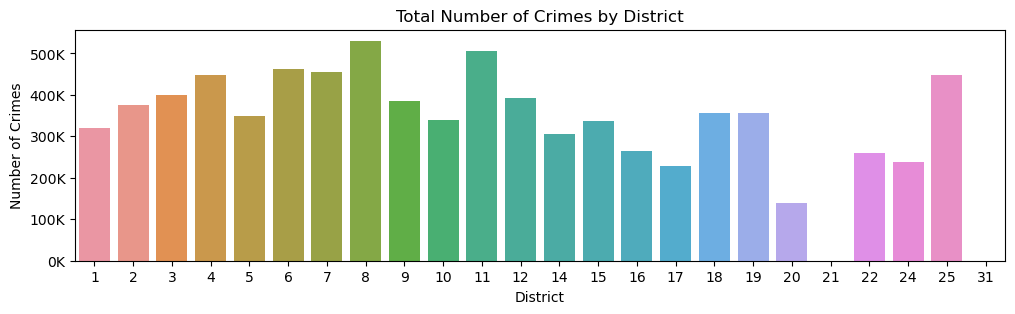

In [125]:
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# set data
plot_series = df_ts['District'].value_counts(dropna = True)

# sns.barplot
ax = sns.barplot(x = plot_series.index,
                y = plot_series.values)

# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)

# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Number of Crimes by District')
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('District')

# show
plt.show();

## Topic 2) Crimes Across the Years:

* Is the total number of crimes increasing or decreasing across the years?

In [62]:
# resample df_ts by year
years_ts = df_ts.resample('Y').size()

# check
years_ts

Date
2001-12-31    485889
2002-12-31    486808
2003-12-31    475985
2004-12-31    469423
2005-12-31    453775
2006-12-31    448178
2007-12-31    437090
2008-12-31    427184
2009-12-31    392827
2010-12-31    370517
2011-12-31    351993
2012-12-31    336323
2013-12-31    307540
2014-12-31    275792
2015-12-31    264796
2016-12-31    269835
2017-12-31    269108
2018-12-31    268912
2019-12-31    261354
2020-12-31    212220
2021-12-31    208878
2022-12-31    238971
2023-12-31    189668
Freq: A-DEC, dtype: int64

In [63]:
plt.rcParams['figure.figsize'] = [10,5]

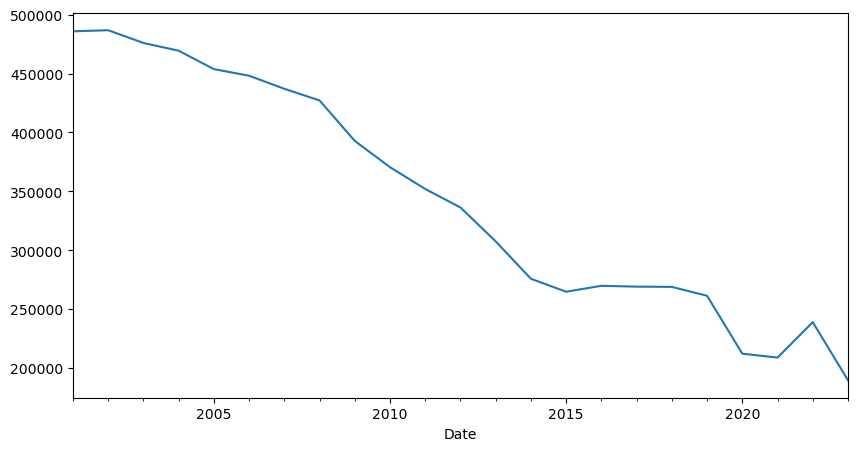

In [65]:
years_ts.plot();

Here we can see the number of crimes has been decreasing with time, in 2020 we had a drastic dip then a sudden increase in 2021.

## Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [66]:
df_ts['Primary Type'].value_counts()

THEFT                                1667847
BATTERY                              1443363
CRIMINAL DAMAGE                       900979
NARCOTICS                             749827
ASSAULT                               517642
OTHER OFFENSE                         490433
BURGLARY                              427587
MOTOR VEHICLE THEFT                   388223
DECEPTIVE PRACTICE                    352852
ROBBERY                               297307
CRIMINAL TRESPASS                     216289
WEAPONS VIOLATION                     110490
PROSTITUTION                           69933
OFFENSE INVOLVING CHILDREN             56625
PUBLIC PEACE VIOLATION                 52730
SEX OFFENSE                            31426
CRIM SEXUAL ASSAULT                    27572
INTERFERENCE WITH PUBLIC OFFICER       18638
LIQUOR LAW VIOLATION                   14983
GAMBLING                               14624
ARSON                                  13488
HOMICIDE                               12856
CRIMINAL S

In [67]:
# clean up 'Primary Type' groupings
df_ts['Primary Type'] = df_ts['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',
                                                      'NON - CRIMINAL': 'NON-CRIMINAL',
                                                      'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
                                                      'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})

# check
df_ts['Primary Type'].value_counts()

THEFT                                1667847
BATTERY                              1443363
CRIMINAL DAMAGE                       900979
NARCOTICS                             749976
ASSAULT                               517642
OTHER OFFENSE                         490433
BURGLARY                              427587
MOTOR VEHICLE THEFT                   388223
DECEPTIVE PRACTICE                    352852
ROBBERY                               297307
CRIMINAL TRESPASS                     216289
WEAPONS VIOLATION                     110490
PROSTITUTION                           69933
OFFENSE INVOLVING CHILDREN             56625
PUBLIC PEACE VIOLATION                 52730
CRIMINAL SEXUAL ASSAULT                35113
SEX OFFENSE                            31426
INTERFERENCE WITH PUBLIC OFFICER       18638
LIQUOR LAW VIOLATION                   14983
GAMBLING                               14624
ARSON                                  13488
HOMICIDE                               12856
KIDNAPPING

In [69]:
# make a copy
pt_ts = df_ts.copy()


# put a '1' in each row
pt_ts['Count'] = 1

# group crimes by 'Primary Type' and resample by year
pt_ts = pt_ts.groupby('Primary Type').resample('Y').sum(numeric_only = True)

# drop unnecessary columns
pt_ts = pt_ts.drop(columns = ['Arrest',
                              'Domestic',
                              'Beat',
                              'District'])
                              


# check
pt_ts

Count
Primary Type      Date             
ARSON             2001-12-31   1011
                  2002-12-31   1032
                  2003-12-31    955
                  2004-12-31    778
                  2005-12-31    691
...                             ...
WEAPONS VIOLATION 2019-12-31   6339
                  2020-12-31   8432
                  2021-12-31   8980
                  2022-12-31   8775
                  2023-12-31   6574

[700 rows x 1 columns]

In [71]:
# use unstack to get plot with different lines for
# different primary types
unstacked = pt_ts.unstack(level = 0)

# check
unstacked

Count                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Date                                              
2001-12-31    1011.0  31384.0  93462.0  26014.0   
2002-12-31    1032.0  31523.0  94153.0  25623.0   
2003-12-31     955.0  29477.0  88380.0  25157.0   
2004-12-31     778.0  28850.0  87136.0  24564.0   
2005-12-31     691.0  27067.0  83964.0  25503.0   
2006-12-31     726.0  25945.0  80666.0  24324.0   
2007-12-31     712.0  26313.0  79593.0  24858.0   
2008-12-31     644.0  25448.0  75930.0  26218.0   
2009-12-31     616.0  22861.0  68460.0  26767.0   
2010-12-31     522.0  21537.0  65401.0  26422.0   
2011-12-31     504.0  20411.0  60459.0  26620.0   
2012-12-31     469.0  19900.0  59134.0  22845.0   
2013-12-31     364.0  17972.0  54006.0  17895.0   
2014-12-31     397.0  16903.0  49453.0  14569.0   
2015-12-31     453.0  17048.0  48923.0  13184.0   
2016-12-31     516.0  18742.0  50300.0  14289.0   
2017-12-31     444.0  19306.0  49239.0  13001.0   
2018-12-31     373.0  20406.0  49828.0  11747.0   
2019-12-31     376.0  20620.0  49517.0   9638.0   
2020-12-31     588.0  18252.0  41514.0   8758.0   
2021-12-31     529.0  20342.0  40463.0   6659.0   
2022-12-31     422.0  20800.0  40920.0   7593.0   
2023-12-31     366.0  16535.0  32462.0   5339.0   

                                                                \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
Date                                                             
2001-12-31                                 1.0         55860.0   
2002-12-31                                 0.0         55941.0   
2003-12-31                                 0.0         55011.0   
2004-12-31                                 0.0         53164.0   
2005-12-31                                 0.0         54548.0   
2006-12-31                                 0.0         57124.0   
2007-12-31                                 0.0         53749.0   
2008-12-31                                 0.0         52843.0   
2009-12-31                                 0.0         47725.0   
2010-12-31                                 0.0         40654.0   
2011-12-31                                 0.0         37331.0   
2012-12-31                                 0.0         35855.0   
2013-12-31                                 0.0         30855.0   
2014-12-31                                15.0         27799.0   
2015-12-31                                34.0         28677.0   
2016-12-31                                36.0         31018.0   
2017-12-31                                69.0         29045.0   
2018-12-31                               149.0         27823.0   
2019-12-31                               217.0         26681.0   
2020-12-31                               148.0         24877.0   
2021-12-31                               173.0         25094.0   
2022-12-31                               177.0         27240.0   
2023-12-31                               150.0         22065.0   

                                                                           \
Primary Type CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS DECEPTIVE PRACTICE   
Date                                                                        
2001-12-31                    1808.0           13241.0            14949.0   
2002-12-31                    1834.0           13880.0            13732.0   
2003-12-31                    1612.0           14807.0            13459.0   
2004-12-31                    1580.0           15913.0            13255.0   
2005-12-31                    1559.0           16655.0            13591.0   
2006-12-31                    1486.0           14505.0            13606.0   
2007-12-31                    1561.0           13699.0            14173.0   
2008-12-31                    1561.0           12310.0            14933.0   
2009-12-31                    1443.0           10851.0            13877.0   
2010-12-31                    1390.0           

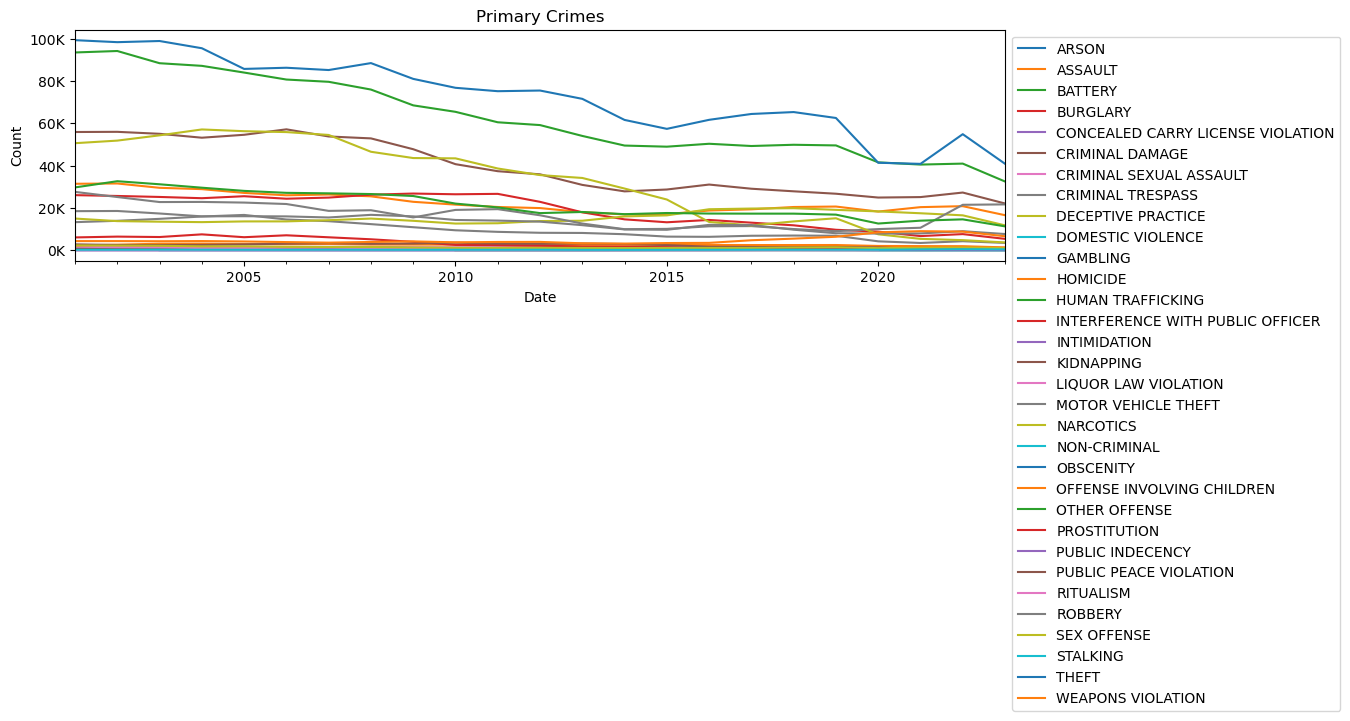

In [107]:
## Create our plot and save the ax


#ax = df_unstacked.plot()

ax = unstacked['Count'].plot()

plt.rcParams['figure.figsize'] = (12,3)

# ax = crypto_unstacked.plot()
ax.set(ylabel="Count", title='Primary Crimes')



# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

#add legend

ax.legend(bbox_to_anchor=[1,1]);


In the plot above you can see rate of crimes decreasing but lets take a closer look with individual plots.

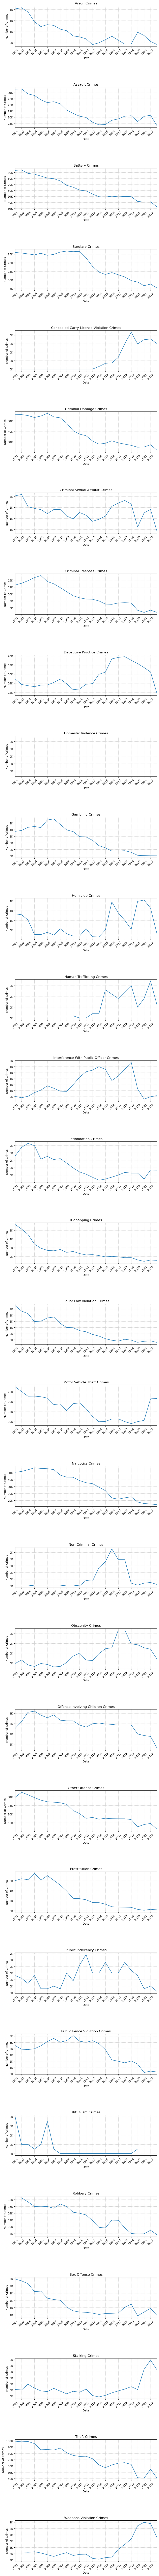

In [192]:
# plot each 'Primary Type' separately
# (plotting together is too busy; can't see
# trends of some of the lines)

# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# subplots
fig, axes = plt.subplots(len(unstacked.columns),
                        1,
                        figsize = (8, 4 * len(unstacked.columns)),
                        sharex = False)

# loop through each column and plot
for i, column in enumerate(unstacked.columns):
    ax = axes[i]
    
    # Y-AXIS FORMATTING
    # create string format for y-axis units
    fmt_thous = mticks.FuncFormatter(thousands)
    # set y-axis major formatter
    ax.yaxis.set_major_formatter(fmt_thous)

    # X-AXIS FORMATTING
    # one tick every year
    major_ticks_loc = mdates.YearLocator(1)
    # 4-digit-year labels
    major_ticks_format = mdates.DateFormatter('%Y')
    # set locator and formatter
    ax.xaxis.set_major_locator(major_ticks_loc)
    ax.xaxis.set_major_formatter(major_ticks_format)

    # set title and axes
    ax.set_title(f'{column[1].title()} Crimes')
    
    ax.set_ylabel('Number of Crimes')
    
    ax.set_xlabel('Year')

    # plot
    unstacked[column].plot(ax = ax)
    
    # rotate x-axis tick labels
    ax.tick_params(axis = 'x', rotation = 45)

    # make year labels on major ticks on x-axis centered
    for label in ax.xaxis.get_majorticklabels():
        label.set_horizontalalignment('center')
        
    # make year label show up on every major tick
    years = pd.date_range(start = '2001', end = '2022', freq = 'AS')
    ax.set_xticks(years)
    ax.set_xticklabels([year.year for year in years])

    
    # add grid
    ax.grid(color='lightgray', linestyle='--')

# plot adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
    
# show
plt.show();

Yes the crimes with a downward trend are: 
* Theft crimes were on a downward trend but spiked in 2021.
* Public peace Violations have been steadily decreasing since 2013 went from over 3k to around 500.
* Prostitution crimes drastically decreased from 2006 to current making these crimes extremely low


The most obvious crimes with an opposite trend are:
* number of Weapons Violation- up until 2015 it was pretty steady and suddenly had a drastic spike in 2016 up until 2022.
* number of Stalking crimes was holding steady until 2013 then slowly increased until 2019 and spiked in 2020 


## Topic 4) Comparing Months:

* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [180]:
## saving just the date (no time) as a column
df_ts['Date'] = df_ts.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df_ts.head(3)

,Primary Type,Description,Arrest,Domestic,Beat,District,US holiday,Date
Date,,,,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1033,10,New Year's Day,2001-01-01
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,False,False,1724,17,New Year's Day,2001-01-01
2001-01-01 13:00:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,1033,10,New Year's Day,2001-01-01


In [182]:
## Engineering Features using components of the date/time
df_ts['Year']  = df_ts.index.year

In [183]:
## Extracting the Month
df_ts['Month'] = df_ts.index.month
df_ts['MonthName'] = df_ts.index.month_name()
df_ts.head(3)

,Primary Type,Description,Arrest,Domestic,Beat,District,US holiday,Date,Month,MonthName,Year
Date,,,,,,,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1033,10,New Year's Day,2001-01-01,1,January,2001
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,False,False,1724,17,New Year's Day,2001-01-01,1,January,2001
2001-01-01 13:00:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,1033,10,New Year's Day,2001-01-01,1,January,2001


In [184]:
# saving lookup for number vs name
unique_months = df_ts.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

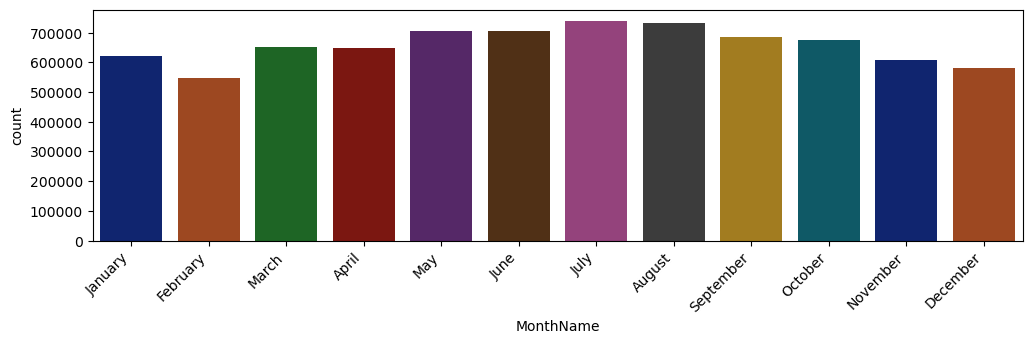

In [186]:
ax = sns.countplot(data=df_ts, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

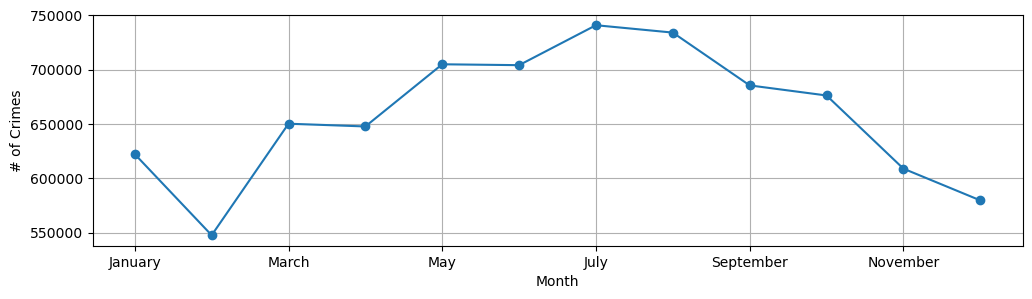

In [188]:
## save month counts
month_counts = df_ts['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### Based on the lineplot above the month of February had the least amount of crimes and the month of July had the most amount of crimes.

### Question #2
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [205]:
## Get individual crimes by Month
crimes_by_month = df_ts.groupby('Primary Type')['MonthName'].value_counts().sort_index()
crimes_by_month


Primary Type       MonthName
ARSON              April         1134
                   August        1217
                   December       923
                   February       841
                   January        963
                                ...  
WEAPONS VIOLATION  March         8804
                   May          10757
                   November      7953
                   October       9190
                   September    10012
Name: MonthName, Length: 372, dtype: int64

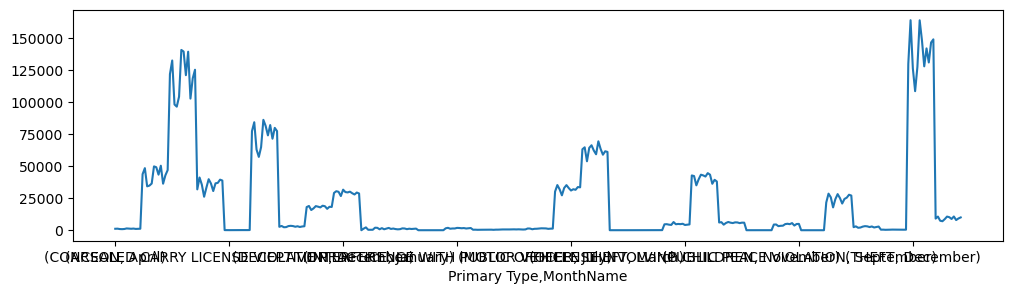

In [198]:
crimes_by_month.plot();
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [212]:
## convert to dataframe and reset_index()
#plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
#plot_df

plot_df = crimes_by_month.to_frame('# of Crimes').reset_index().sort_values('MonthName')
plot_df

,Primary Type,MonthName,# of Crimes
0,ARSON,April,1134
312,ROBBERY,April,21660
301,RITUALISM,April,1
48,CONCEALED CARRY LICENSE VIOLATION,April,90
289,PUBLIC PEACE VIOLATION,April,4423
...,...,...,...
228,NON-CRIMINAL,September,23
95,CRIMINAL TRESPASS,September,18208
347,STALKING,September,432
11,ARSON,September,1171


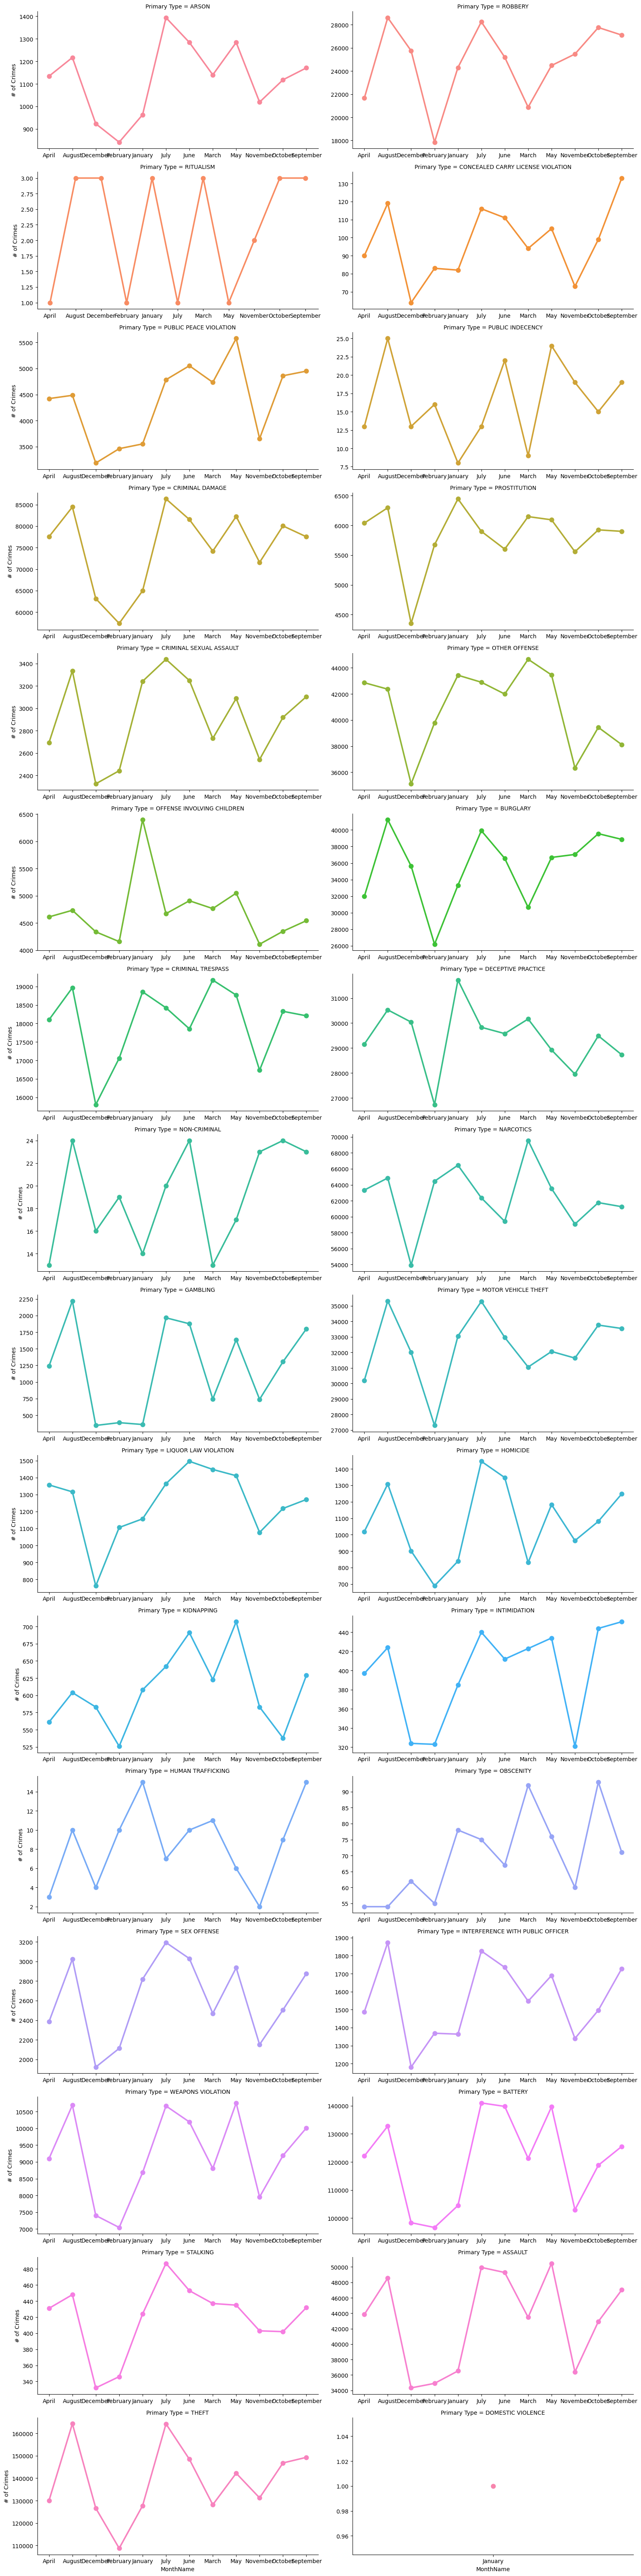

In [220]:
g = sns.catplot(data=plot_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

# Iterate over each subplot and add a grid to the x-axis
for ax in g.axes.flat:
    ax.grid(axis='x')

plt.show()


### Here we can see the majority of crimes committed in february are still low. While there was a few that where higher the majority was low. While July had the highest crimes committed not much changed when we looked at individual crimes.